# Case study for the AR2 model

We will here use DNN to learn the summary statistics when considering ABC inference for the AR3 model. The network archtitures that we will consider are: MLP, and BP-DeepSets.

#### The AR2 process 

The AR2 model follows

$y_i = \theta_1 y_{i-1} + \theta_2 y_{i-2} + \epsilon_i,\epsilon_i \sim N(0,1)  $


## Setup

In [1]:
# set path
cd("..") # set correct working directory 
pwd() # this path should go to the folder with the .git file 

# load packages 
using Pkg
using PyPlot
using DataFrames
using CSV
using KernelDensity
using Distributions
using Statistics

# load files 
include(pwd()*"/src/AR2/set_up.jl")


# load data
y_test = Matrix(CSV.read("data/AR2/y_test.csv"; allowmissing=:auto));

Loading AR2 model


Compute exact posterior

In [2]:
posterior_exact = Matrix(CSV.read("data/AR2/exact_mcmc_post.csv"; allowmissing=:auto))'

z_exact = kde((posterior_exact[1,:], posterior_exact[2,:]))

h1_exact = kde(posterior_exact[1,:])
h2_exact = kde(posterior_exact[2,:]);

## Network performance 

### Results using ABC with hand-pricked summary stats

Load results. 

In [3]:
posterior_summary_stats = Matrix(CSV.read("data/AR2/abcrs_post.csv"; allowmissing=:auto))'
h1_summary = kde(posterior_summary_stats[1,:])
h2_summary = kde(posterior_summary_stats[2,:]);

#### Posterior inference  

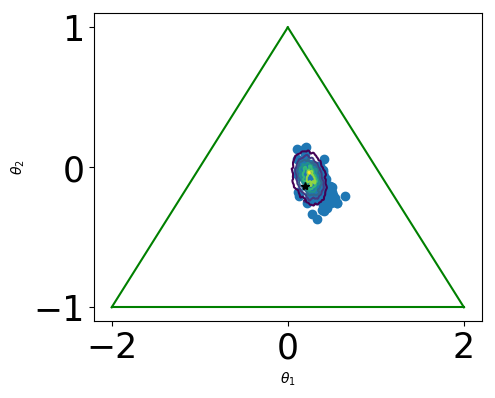

In [4]:
# posterior 
PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()
PyPlot.plot((-2,2),(-1,-1), "g")
PyPlot.plot((-2,0),(-1,1), "g")
PyPlot.plot((2,0),(-1,1), "g")
PyPlot.scatter(posterior_summary_stats[1,:],posterior_summary_stats[2,:])
PyPlot.plt[:contour](z_exact.x, z_exact.y, z_exact.density)
PyPlot.plot(θ_true[1],θ_true[2], "k*")
PyPlot.xlabel(L"$\theta_1$")
PyPlot.ylabel(L"$\theta_2$")
ax[:tick_params]("both",labelsize=25) 
PyPlot.savefig("figures/res_ar2_posteriors_10^6_training_obs_handpicked.eps", format="eps", dpi=1000);

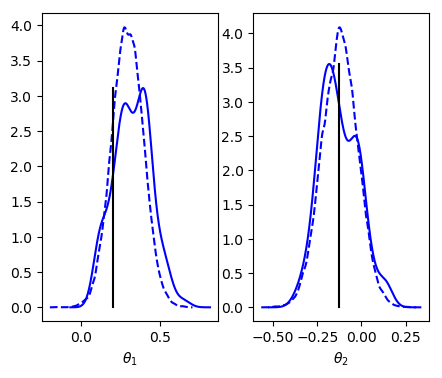

In [5]:
# Marginal posterior
PyPlot.figure(figsize=(5,4))
PyPlot.subplot(121)
PyPlot.plot(h1_summary.x,h1_summary.density, "b")
PyPlot.plot(h1_exact.x,h1_exact.density, "b--")
PyPlot.plot((θ_true[1], θ_true[1]), (0, maximum(h1_summary.density)), "k")
PyPlot.xlabel(L"$\theta_1$")
PyPlot.subplot(122)
PyPlot.plot(h2_summary.x,h2_summary.density, "b")
PyPlot.plot(h2_exact.x,h2_exact.density, "b--")
PyPlot.plot((θ_true[2], θ_true[2]), (0, maximum(h2_summary.density)), "k")
PyPlot.xlabel(L"$\theta_2$");

### Results using MLP

#### Network info

Structure: 100 (input) -> 100 -> 100 -> 50 -> 2 (output), fully connected, relu activation.

Number weights: 25352 

Training time: 4026.31 sec (1.2 h).

ABC runtime: 75.54 sec.

Load results. 

In [6]:
loss_training_dnn_simple = Matrix(CSV.read("data/AR2/loss_vec_training_DNN_simple_1.csv"; allowmissing=:auto))
loss_val_dnn_simple = Matrix(CSV.read("data/AR2/loss_vec_val_DNN_simple_1.csv"; allowmissing=:auto))
predictions_dnn_simple = Matrix(CSV.read("data/AR2/predictions_DNN_simple_1.csv"; allowmissing=:auto))

posterior_simple_DNN = Matrix(CSV.read("data/AR2/DNN_simple_1_abcrs_post.csv"; allowmissing=:auto))'
h1_DNN = kde(posterior_simple_DNN[1,:])
h2_DNN = kde(posterior_simple_DNN[2,:]);

#### Network performance  

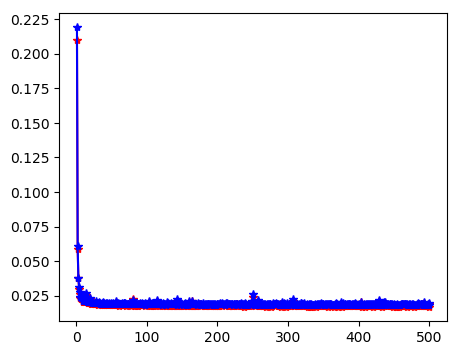

In [7]:
# plot training and val error
PyPlot.figure(figsize=(5,4))
PyPlot.plot(1:length(loss_training_dnn_simple), loss_training_dnn_simple[:], "*-r")
PyPlot.plot(1:length(loss_training_dnn_simple), loss_val_dnn_simple[:], "*-b");

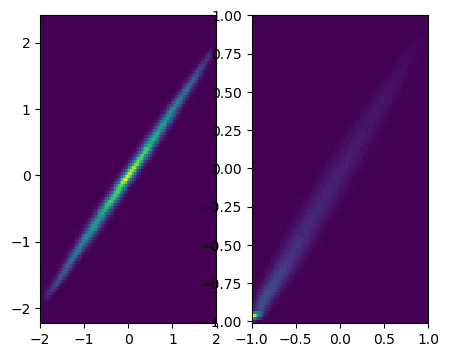

In [8]:
# plot predictions
PyPlot.figure(figsize=(5,4))
PyPlot.subplot(121)
PyPlot.plt[:hist2d](y_test[:,1], predictions_dnn_simple[:,1], bins=(100, 100))
PyPlot.subplot(122)
PyPlot.plt[:hist2d](y_test[:,2], predictions_dnn_simple[:,2], bins=(100, 100));

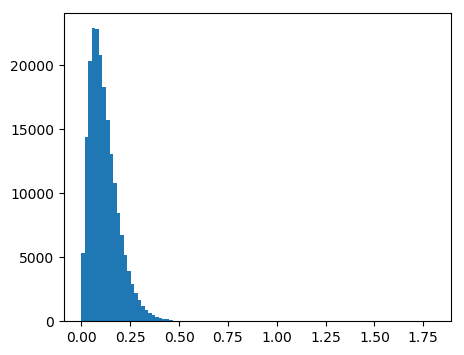

In [9]:
# check pred error
loss_test = sqrt.(sum((predictions_dnn_simple - y_test).^2, dims=2))

PyPlot.figure(figsize=(5,4))
h = PyPlot.plt[:hist](loss_test,100);

#### Posterior inference  

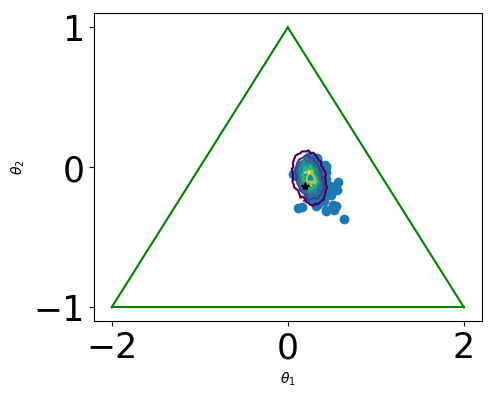

In [10]:
# Posterior
PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()
PyPlot.plot((-2,2),(-1,-1), "g")
PyPlot.plot((-2,0),(-1,1), "g")
PyPlot.plot((2,0),(-1,1), "g")
PyPlot.scatter(posterior_simple_DNN[1,:],posterior_simple_DNN[2,:])
PyPlot.plt[:contour](z_exact.x, z_exact.y, z_exact.density)
PyPlot.plot(θ_true[1],θ_true[2], "k*")
PyPlot.xlabel(L"$\theta_1$")
PyPlot.ylabel(L"$\theta_2$")
ax[:tick_params]("both",labelsize=25) 
PyPlot.savefig("figures/res_ar2_posteriors_10^6_training_obs_mlp.eps", format="eps", dpi=1000);

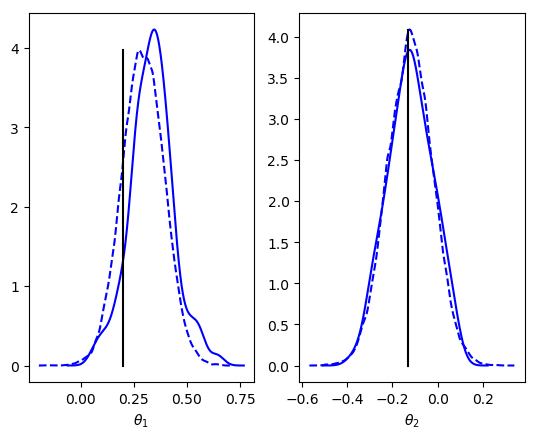

In [11]:
# Marginal posterior
PyPlot.figure()
PyPlot.subplot(121)
PyPlot.plot(h1_DNN.x,h1_DNN.density, "b")
PyPlot.plot(h1_exact.x,h1_exact.density, "b--")
PyPlot.plot((θ_true[1], θ_true[1]), (0, maximum(h1_exact.density)), "k")
PyPlot.xlabel(L"$\theta_1$")
PyPlot.subplot(122)
PyPlot.plot(h2_DNN.x,h2_DNN.density, "b")
PyPlot.plot(h2_exact.x,h2_exact.density, "b--")
PyPlot.plot((θ_true[2], θ_true[2]), (0, maximum(h2_exact.density)), "k")
PyPlot.xlabel(L"$\theta_2$");

### BSN 

#### Network info

Structure: 11 (input) -> 100 -> 50 -> 10 (output inner), summation, then 10 (input outer) -> 50 -> 50 -> 20 -> 2 (output)

Number weights: 10922

Training time: 23729.39 sec (6.6 h)

ABC runtime: 

Load results. 

In [12]:
loss_training_bp_deepsets = Matrix(CSV.read("data/AR2/loss_vec_training_bp_deepsets_1.csv"; allowmissing=:auto))
loss_val_dnn_bp_deepsets = Matrix(CSV.read("data/AR2/loss_vec_val_bp_deepsets_1.csv"; allowmissing=:auto))
predictions_bp_deepsets = Matrix(CSV.read("data/AR2/predictions_bp_deepsets_1.csv"; allowmissing=:auto))

posterior_bp_deepsets = Matrix(CSV.read("data/AR2/bp_deepsets_1_abcrs_post.csv"; allowmissing=:auto))'
h1_bp_deepsets = kde(posterior_bp_deepsets[1,:])
h2_bp_deepsets = kde(posterior_bp_deepsets[2,:]);

#### Network performance  

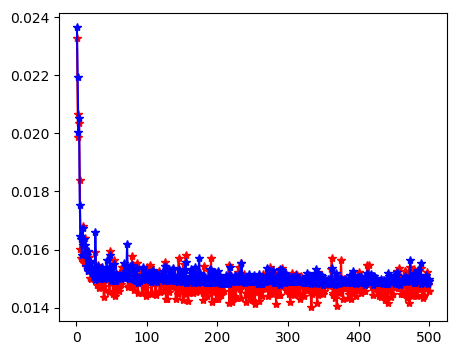

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe6fc452be0>

In [13]:
# plot training and val error
PyPlot.figure(figsize=(5,4))
PyPlot.plot(1:length(loss_training_dnn_simple), loss_training_bp_deepsets[:], "*-r")
PyPlot.plot(1:length(loss_training_dnn_simple), loss_val_dnn_bp_deepsets[:], "*-b")

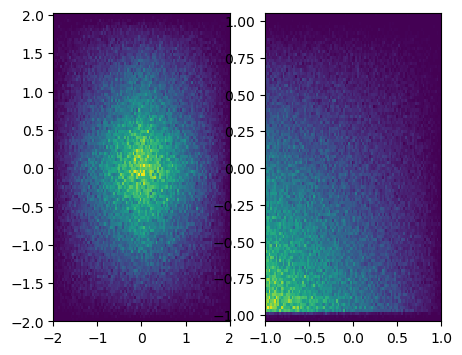

In [14]:
# plot predictions
PyPlot.figure(figsize=(5,4))
PyPlot.subplot(121)
PyPlot.plt[:hist2d](y_test[:,1], predictions_bp_deepsets[:,1], bins=(100, 100))
PyPlot.subplot(122)
PyPlot.plt[:hist2d](y_test[:,2], predictions_bp_deepsets[:,2], bins=(100, 100));

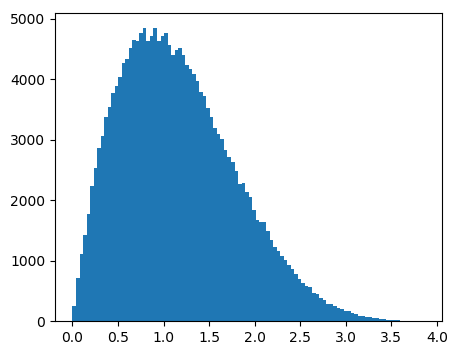

In [15]:
# check pred error
loss_test = sqrt.(sum((predictions_bp_deepsets - y_test).^2,dims = 2))

PyPlot.figure(figsize=(5,4))
h = PyPlot.plt[:hist](loss_test,100);


#### Posterior inference  

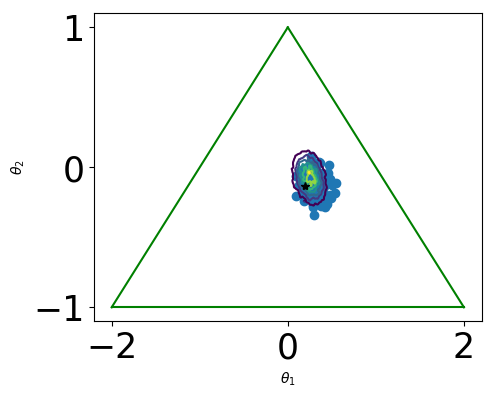

In [16]:
# posterior
PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()
PyPlot.plot((-2,2),(-1,-1), "g")
PyPlot.plot((-2,0),(-1,1), "g")
PyPlot.plot((2,0),(-1,1), "g")
PyPlot.scatter(posterior_bp_deepsets[1,:],posterior_bp_deepsets[2,:])
PyPlot.plt[:contour](z_exact.x, z_exact.y, z_exact.density)
PyPlot.plot(θ_true[1],θ_true[2], "k*")
PyPlot.xlabel(L"$\theta_1$")
PyPlot.ylabel(L"$\theta_2$")
ax[:tick_params]("both",labelsize=25) 
PyPlot.savefig("figures/res_ar2_posteriors_10^6_training_obs_bsn.eps", format="eps", dpi=1000);

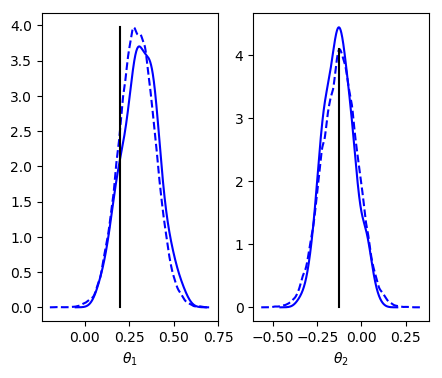

In [17]:
# marginal posterior
PyPlot.figure(figsize=(5,4))
PyPlot.subplot(121)
PyPlot.plot(h1_bp_deepsets.x,h1_bp_deepsets.density, "b")
PyPlot.plot(h1_exact.x,h1_exact.density, "b--")
PyPlot.plot((θ_true[1], θ_true[1]), (0, maximum(h1_exact.density)), "k")
PyPlot.xlabel(L"$\theta_1$")
PyPlot.subplot(122)
PyPlot.plot(h2_bp_deepsets.x,h2_bp_deepsets.density, "b")
PyPlot.plot(h2_exact.x,h2_exact.density, "b--")
PyPlot.plot((θ_true[2], θ_true[2]), (0, maximum(h2_exact.density)), "k")
PyPlot.xlabel(L"$\theta_2$");

### Plot posteriors in same figure 

Plot posteriors in same figure.

## Posterior inference results (over multiple data sets)

Set up, load true parameter values, and set exact posterior means.

In [18]:
include(pwd()*"/src/utilities/multivar_cramer.jl")

θ_1_true, θ_2_true = θ_true

2-element Array{Float64,1}:
  0.2 
 -0.13

### Exact posterior 

In [19]:
posterior_exact = Array(Matrix(CSV.read("data/AR2/posteriors_multiple_data_sets_exact.csv"; allowmissing=:auto))');

### ABC with hand-pricked summary stats

Posterior mean loss and true paramter loss for.

In [20]:
posterior = Matrix(CSV.read("data/AR2/posteriors_multiple_data_sets_abcrs.csv"; allowmissing=:auto))

θ_1_hat = mean(posterior[1:2:end,:],dims=1)
θ_2_hat = mean(posterior[2:2:end,:],dims=1)

# loss

println("Ground-truth mean loss:")
println(sqrt(mean((θ_1_hat.-θ_1_true).^2)))
println(sqrt(mean((θ_2_hat.-θ_2_true).^2)))


Ground-truth mean loss:
0.020974561452752127
0.011294355045617014


Calc multivariate Cramer test statistics.

In [21]:
test_stats_abc = zeros(size(posterior,2))
idx = 0
for i in 1:2:size(posterior,1)
    global idx = idx + 1
    global test_stats_abc[idx] = multvar_cramer_stat(posterior[i:i+1,:],posterior_exact[i:i+1,1:500])
end

### MLP

Posterior mean loss and true paramter loss for DNN.

In [22]:
posterior = Matrix(CSV.read("data/AR2/posteriors_multiple_data_sets_DNN_simple_1.csv"; allowmissing=:auto))

θ_1_hat = mean(posterior[1:2:end,:],dims=1)
θ_2_hat = mean(posterior[2:2:end,:],dims=1)

# loss

println("Ground-truth mean loss:")
println(sqrt(mean((θ_1_hat.-θ_1_true).^2)))
println(sqrt(mean((θ_2_hat.-θ_2_true).^2)))


Ground-truth mean loss:
0.03412341002402094
0.03962106836502285


Calc multivariate Cramer test statistics.

In [23]:
test_stats_dnn = zeros(size(posterior,2))
idx = 0
for i in 1:2:size(posterior,1)
    global idx = idx + 1
    global test_stats_dnn[idx] = multvar_cramer_stat(posterior[i:i+1,:],posterior_exact[i:i+1,1:500])
end

### BSN

Posterior mean loss and true paramter loss for BP-Deepsets.

In [24]:
posterior = Matrix(CSV.read("data/AR2/posteriors_multiple_data_sets_bp_deepsets_1.csv"; allowmissing=:auto))

θ_1_hat = mean(posterior[1:2:end,:],dims=1)
θ_2_hat = mean(posterior[2:2:end,:],dims=1)

# loss

println("Ground-truth mean loss:")
println(sqrt(mean((θ_1_hat.-θ_1_true).^2)))
println(sqrt(mean((θ_2_hat.-θ_2_true).^2)))

Ground-truth mean loss:
0.0327744243525941
0.03296871379625903


Calc multivariate Cramer test statistics.

In [25]:
test_stats_bp_deepsets = zeros(size(posterior,2))
idx = 0
for i in 1:2:size(posterior,1)
    global idx = idx + 1
    global test_stats_bp_deepsets[idx] = multvar_cramer_stat(posterior[i:i+1,:],posterior_exact[i:i+1,1:500])
end

#### Compare multivariate Cramer test statistics

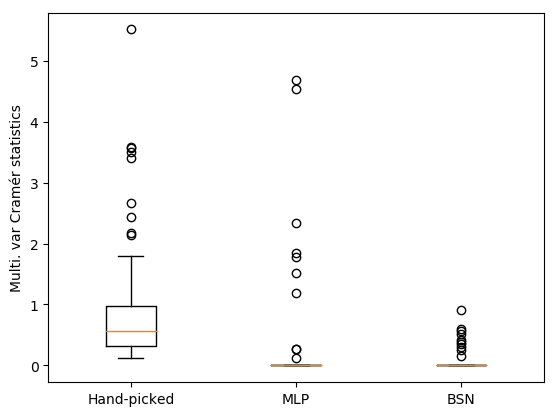

PyObject Text(24,0.5,'Multi. var Cramér statistics')

In [26]:
data = zeros(length(test_stats_abc),3)

data[:,1] = test_stats_abc
data[:,2] = test_stats_dnn
data[:,3] = test_stats_bp_deepsets

PyPlot.figure()
PyPlot.boxplot(data)
PyPlot.xticks([1, 2, 3], ["Hand-picked", "MLP", "BSN"]);
PyPlot.ylabel("Multi. var Cramér statistics")

## Network performance with different traning data size

Load results for MLP, CNN and BP-Deepsets.

In [27]:
posterior_2 = Matrix(CSV.read("data/AR2/posteriors_multiple_data_sets_DNN_simple_2.csv"; allowmissing=:auto))
posterior_3 = Matrix(CSV.read("data/AR2/posteriors_multiple_data_sets_DNN_simple_3.csv"; allowmissing=:auto))
posterior_4 = Matrix(CSV.read("data/AR2/posteriors_multiple_data_sets_DNN_simple_4.csv"; allowmissing=:auto))

test_stats_DNN_simple_2 = zeros(size(posterior,2))
test_stats_DNN_simple_3 = zeros(size(posterior,2))
test_stats_DNN_simple_4 = zeros(size(posterior,2))

idx = 0
for i in 1:2:size(posterior,1)
    global idx = idx + 1
    global test_stats_DNN_simple_2[idx] = multvar_cramer_stat(posterior_2[i:i+1,:],posterior_exact[i:i+1,1:500])
    global test_stats_DNN_simple_3[idx] = multvar_cramer_stat(posterior_3[i:i+1,:],posterior_exact[i:i+1,1:500])
    global test_stats_DNN_simple_4[idx] = multvar_cramer_stat(posterior_4[i:i+1,:],posterior_exact[i:i+1,1:500])
end

posterior_2 = Matrix(CSV.read("data/AR2/posteriors_multiple_data_sets_bp_deepsets_2.csv"; allowmissing=:auto))
posterior_3 = Matrix(CSV.read("data/AR2/posteriors_multiple_data_sets_bp_deepsets_3.csv"; allowmissing=:auto))
posterior_4 = Matrix(CSV.read("data/AR2/posteriors_multiple_data_sets_bp_deepsets_4.csv"; allowmissing=:auto))

test_stats_bp_deepsets_2 = zeros(size(posterior,2))
test_stats_bp_deepsets_3 = zeros(size(posterior,2))
test_stats_bp_deepsets_4 = zeros(size(posterior,2))

idx = 0
for i in 1:2:size(posterior,1)
    global idx = idx + 1
    global test_stats_bp_deepsets_2[idx] = multvar_cramer_stat(posterior_2[i:i+1,:],posterior_exact[i:i+1,1:500])
    global test_stats_bp_deepsets_3[idx] = multvar_cramer_stat(posterior_3[i:i+1,:],posterior_exact[i:i+1,1:500])
    global test_stats_bp_deepsets_4[idx] = multvar_cramer_stat(posterior_4[i:i+1,:],posterior_exact[i:i+1,1:500])
end


Store test statistics in matrices. 

In [28]:
data2 = zeros(length(test_stats_abc),2)

data2[:,1] = test_stats_DNN_simple_2
data2[:,2] = test_stats_bp_deepsets_2

data3 = zeros(length(test_stats_abc),2)

data3[:,1] = test_stats_DNN_simple_3
data3[:,2] = test_stats_bp_deepsets_3

data4 = zeros(length(test_stats_abc),2)

data4[:,1] = test_stats_DNN_simple_4
data4[:,2] = test_stats_bp_deepsets_4

data_mean_stats = [mean(data[:,2:end],dims=1); mean(data2,dims=1); mean(data3,dims=1); mean(data4,dims=1)];

Compare results training on 10^6 observations. 

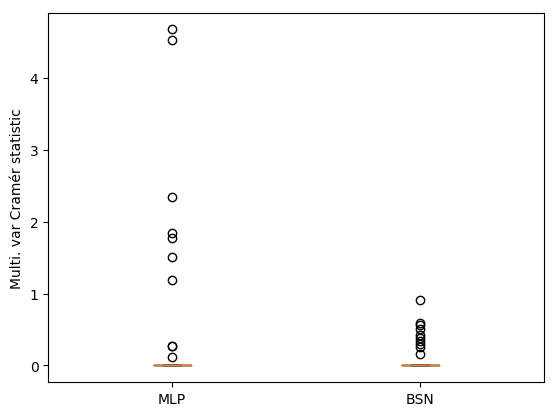

PyObject Text(24,0.5,'Multi. var Cramér statistic')

In [29]:
PyPlot.figure()
PyPlot.boxplot(data[:,2:end])
PyPlot.xticks([1, 2], ["MLP","BSN"]);
PyPlot.ylabel("Multi. var Cramér statistic")

Compare results training on 10^5 observations. 

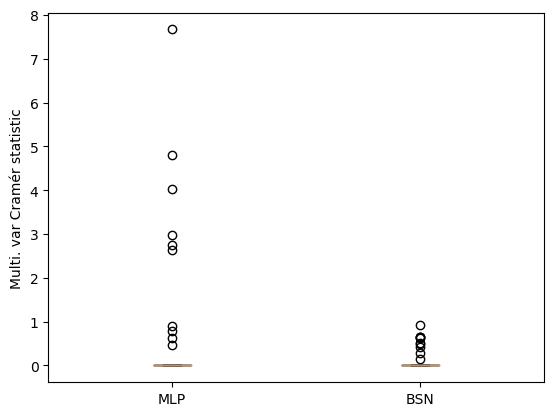

PyObject Text(24,0.5,'Multi. var Cramér statistic')

In [30]:
PyPlot.figure()
PyPlot.boxplot(data2)
PyPlot.xticks([1, 2], ["MLP", "BSN"]);
PyPlot.ylabel("Multi. var Cramér statistic")

Compare results training on 10^4 observations. 

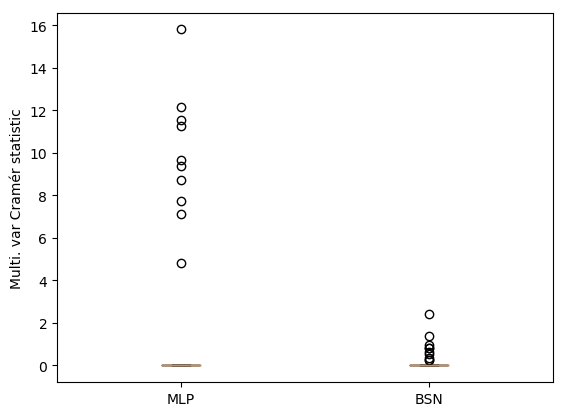

PyObject Text(24,0.5,'Multi. var Cramér statistic')

In [31]:
PyPlot.figure()
PyPlot.boxplot(data3)
PyPlot.xticks([1, 2], ["MLP", "BSN"]);
PyPlot.ylabel("Multi. var Cramér statistic")

Compare results training on 10^3 observations. 

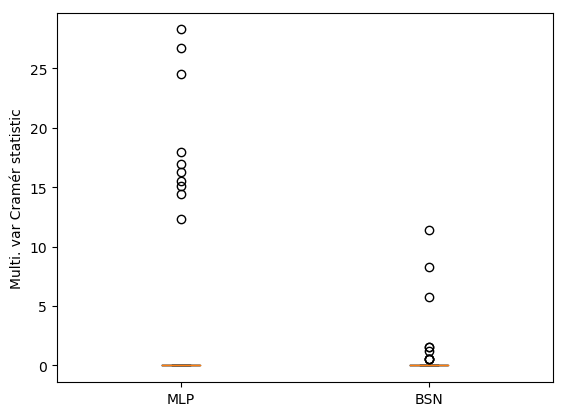

PyObject Text(24,0.5,'Multi. var Cramér statistic')

In [32]:
PyPlot.figure()
PyPlot.boxplot(data4)
PyPlot.xticks([1, 2], ["MLP", "BSN"]);
PyPlot.ylabel("Multi. var Cramér statistic")

Plot multi. var Cramer statistics as function of the training data size. Blue line MLP, and green line BP-Deepsets.

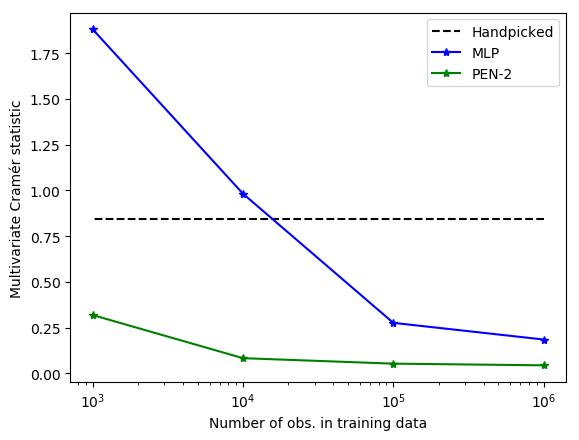

In [33]:
# plotting
x_scale = [10^6, 10^5, 10^4, 10^3]

PyPlot.figure()
PyPlot.semilogx(x_scale,[mean(data[:,1]);mean(data[:,1]);mean(data[:,1]);mean(data[:,1])], "--k")
PyPlot.semilogx(x_scale, data_mean_stats[:,1], "*-b")
PyPlot.semilogx(x_scale, data_mean_stats[:,2], "*-g")
PyPlot.xlabel("Number of obs. in training data")
PyPlot.ylabel("Multivariate Cramér statistic")
PyPlot.legend(("Handpicked","MLP","PEN-2"))
PyPlot.savefig("figures/res_ar2.eps", format="eps", dpi=1000)

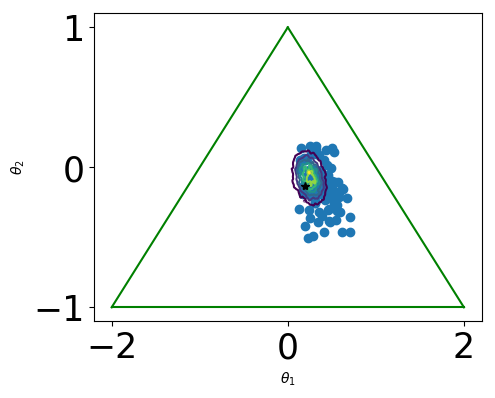

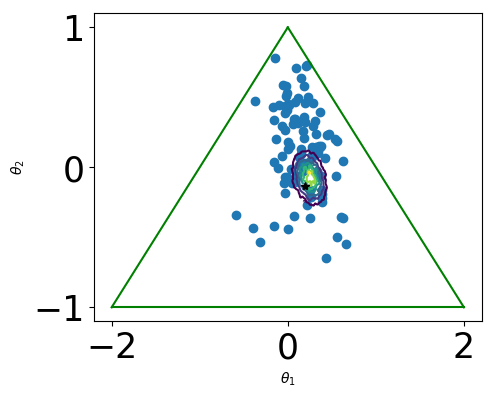

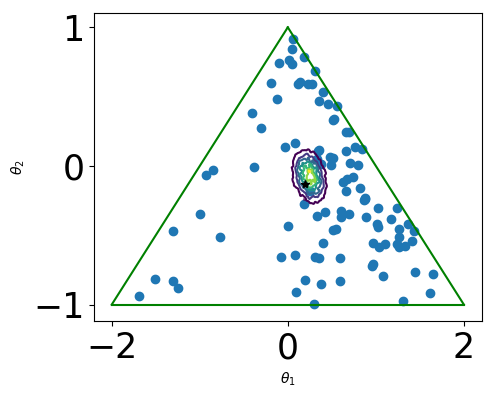

In [11]:
posterior_2 = Matrix(CSV.read("data/AR2/posteriors_multiple_data_sets_DNN_simple_2.csv"; allowmissing=:auto))
posterior_3 = Matrix(CSV.read("data/AR2/posteriors_multiple_data_sets_DNN_simple_3.csv"; allowmissing=:auto))
posterior_4 = Matrix(CSV.read("data/AR2/posteriors_multiple_data_sets_DNN_simple_4.csv"; allowmissing=:auto))


PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()
PyPlot.plot((-2,2),(-1,-1), "g")
PyPlot.plot((-2,0),(-1,1), "g")
PyPlot.plot((2,0),(-1,1), "g")
PyPlot.scatter(posterior_2[1,:],posterior_2[2,:])
PyPlot.plt[:contour](z_exact.x, z_exact.y, z_exact.density)
PyPlot.plot(θ_true[1],θ_true[2], "k*")
PyPlot.xlabel(L"$\theta_1$")
PyPlot.ylabel(L"$\theta_2$")
ax[:tick_params]("both",labelsize=25) 
PyPlot.savefig("figures/res_ar2_posteriors_10^5_training_obs_mlp.eps", format="eps", dpi=1000);

PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()
PyPlot.plot((-2,2),(-1,-1), "g")
PyPlot.plot((-2,0),(-1,1), "g")
PyPlot.plot((2,0),(-1,1), "g")
PyPlot.scatter(posterior_3[1,:],posterior_3[2,:])
PyPlot.plt[:contour](z_exact.x, z_exact.y, z_exact.density)
PyPlot.plot(θ_true[1],θ_true[2], "k*")
PyPlot.xlabel(L"$\theta_1$")
PyPlot.ylabel(L"$\theta_2$")
ax[:tick_params]("both",labelsize=25) 
PyPlot.savefig("figures/res_ar2_posteriors_10^4_training_obs_mlp.eps", format="eps", dpi=1000);


PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()
PyPlot.plot((-2,2),(-1,-1), "g")
PyPlot.plot((-2,0),(-1,1), "g")
PyPlot.plot((2,0),(-1,1), "g")
PyPlot.scatter(posterior_4[1,:],posterior_4[2,:])
PyPlot.plt[:contour](z_exact.x, z_exact.y, z_exact.density)
PyPlot.plot(θ_true[1],θ_true[2], "k*")
PyPlot.xlabel(L"$\theta_1$")
PyPlot.ylabel(L"$\theta_2$")
ax[:tick_params]("both",labelsize=25) 
PyPlot.savefig("figures/res_ar2_posteriors_10^3_training_obs_mlp.eps", format="eps", dpi=1000);

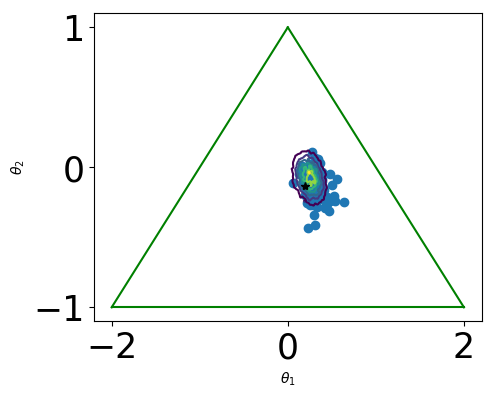

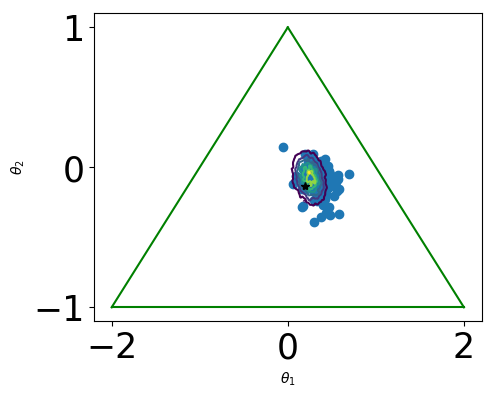

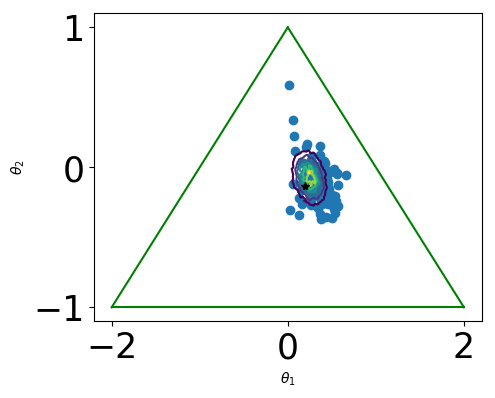

In [12]:
posterior_2 = Matrix(CSV.read("data/AR2/posteriors_multiple_data_sets_bp_deepsets_2.csv"; allowmissing=:auto))
posterior_3 = Matrix(CSV.read("data/AR2/posteriors_multiple_data_sets_bp_deepsets_3.csv"; allowmissing=:auto))
posterior_4 = Matrix(CSV.read("data/AR2/posteriors_multiple_data_sets_bp_deepsets_4.csv"; allowmissing=:auto))

PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()
PyPlot.plot((-2,2),(-1,-1), "g")
PyPlot.plot((-2,0),(-1,1), "g")
PyPlot.plot((2,0),(-1,1), "g")
PyPlot.scatter(posterior_2[1,:],posterior_2[2,:])
PyPlot.plt[:contour](z_exact.x, z_exact.y, z_exact.density)
PyPlot.plot(θ_true[1],θ_true[2], "k*")
PyPlot.xlabel(L"$\theta_1$")
PyPlot.ylabel(L"$\theta_2$")
ax[:tick_params]("both",labelsize=25) 
PyPlot.savefig("figures/res_ar2_posteriors_10^5_training_obs_bsn.eps", format="eps", dpi=1000);

PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()
PyPlot.plot((-2,2),(-1,-1), "g")
PyPlot.plot((-2,0),(-1,1), "g")
PyPlot.plot((2,0),(-1,1), "g")
PyPlot.scatter(posterior_3[1,:],posterior_3[2,:])
PyPlot.plt[:contour](z_exact.x, z_exact.y, z_exact.density)
PyPlot.plot(θ_true[1],θ_true[2], "k*")
PyPlot.xlabel(L"$\theta_1$")
PyPlot.ylabel(L"$\theta_2$")
ax[:tick_params]("both",labelsize=25) 
PyPlot.savefig("figures/res_ar2_posteriors_10^4_training_obs_bsn.eps", format="eps", dpi=1000);

PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()
PyPlot.plot((-2,2),(-1,-1), "g")
PyPlot.plot((-2,0),(-1,1), "g")
PyPlot.plot((2,0),(-1,1), "g")
PyPlot.scatter(posterior_4[1,:],posterior_4[2,:])
PyPlot.plt[:contour](z_exact.x, z_exact.y, z_exact.density)
PyPlot.plot(θ_true[1],θ_true[2], "k*")
PyPlot.xlabel(L"$\theta_1$")
PyPlot.ylabel(L"$\theta_2$")
ax[:tick_params]("both",labelsize=25) 
PyPlot.savefig("figures/res_ar2_posteriors_10^3_training_obs_bsn.eps", format="eps", dpi=1000);